In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

Approximation coefficients at scale 0: [ 1  1 -1 -1 -1 -1 -2  2]
Wavelet coefficients at scale 1: [ 0.          0.          0.         -2.82842712  0.          0.
  0.          0.        ]


Approximation coefficients at scale 1: [ 1.41421356 -1.41421356 -1.41421356  0.          0.          0.
  0.          0.        ]
Wavelet coefficients at scale 2: [ 2. -1.  0.  0.  0.  0.  0.  0.]


Approximation coefficients at scale 2: [ 0. -1.  0.  0.  0.  0.  0.  0.]
Wavelet coefficients at scale 3: [0.70710678 0.         0.         0.         0.         0.
 0.         0.        ]


Approximation coefficients at scale 3: [-0.70710678  0.          0.          0.          0.          0.
  0.          0.        ]




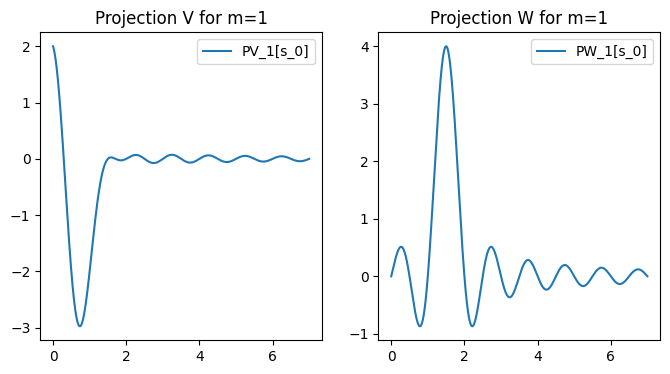

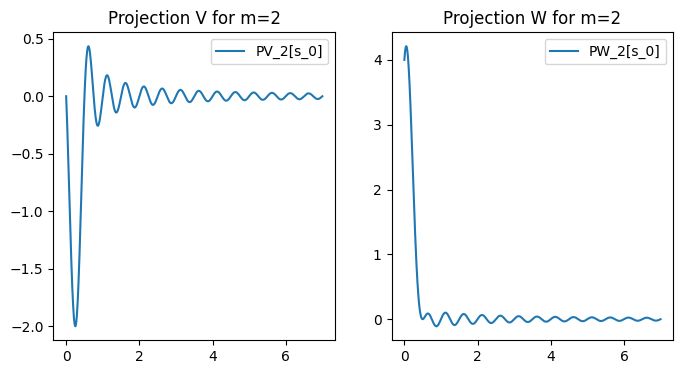

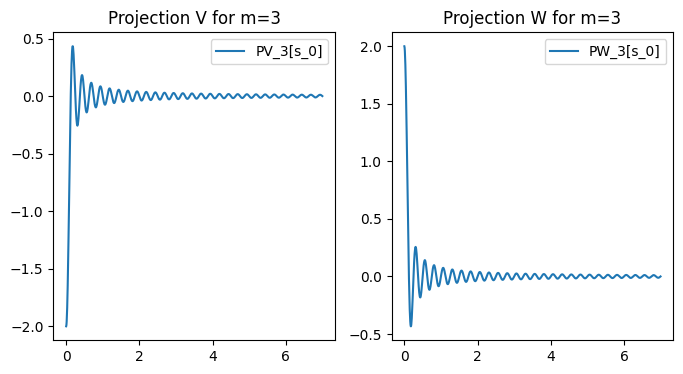

In [20]:
# 1. Coefficients and projections

def haar_wavelet_transform(s_0):

    # Perform one level of Haar wavelet transform.

    n = len(s_0)
    s_m = np.zeros(n)
    w_m = np.zeros(n)

    for k in range(0, n, 2):
        s_m[k // 2] = (s_0[k] + s_0[k + 1]) / np.sqrt(2)
        w_m[k // 2] = (s_0[k] - s_0[k + 1]) / np.sqrt(2)

    return s_m, w_m

def wavedec(s_0, M):

    # Perform Discrete Wavelet Transform (DWT) using Haar wavelets.

    approximation_coeffs = [s_0]
    wavelet_coeffs = []

    for m in range(1, M+1):
        s_0 = approximation_coeffs[-1]
        s_m, w_m = haar_wavelet_transform(s_0)
        approximation_coeffs.append(s_m)
        wavelet_coeffs.append(w_m)

    return approximation_coeffs, wavelet_coeffs

# Example signal s_0 = (1, 1, -1, -1, -1, -1, -2, 2)
s_0 = np.array([1, 1, -1, -1, -1, -1, -2, 2])

# Perform DWT with M=3 levels
M = 3
approximation_coeffs, wavelet_coeffs = wavedec(s_0, M)

# Display the results
for m in range(M + 1):
    print(f"Approximation coefficients at scale {m}: {approximation_coeffs[m]}")
    if m < M:
        print(f"Wavelet coefficients at scale {m + 1}: {wavelet_coeffs[m]}")
    print("\n")

# Projections

def phi_function(t, k, m):

    # Evaluate the scaling function phi_m,k(t).

    return np.sqrt(2 ** m) * np.sinc(2 ** m * t - k)

def psi_function(t, k, m):

    # Evaluate the wavelet function psi_m,k(t).

    return np.sqrt(2 ** m) * np.sinc(2 ** m * t - k) * ((-1) ** k)

def calculate_projection(approx_coeffs, wavelet_coeffs, m, t_values):

    # Calculate the projection PV_m[s_0] and PW_m[s_0].

    projection_V = np.zeros_like(t_values)
    projection_W = np.zeros_like(t_values)

    for k in range(len(approx_coeffs)):
        projection_V += approx_coeffs[k] * phi_function(t_values, k, m)

    for k in range(len(wavelet_coeffs)):
        projection_W += wavelet_coeffs[k] * psi_function(t_values, k, m)

    return projection_V, projection_W

# Time values for plotting
t_values = np.linspace(0, 7, 1000)

# Calculate projections for m = 1, 2, 3
for m in range(1, M + 1):
    projection_V, projection_W = calculate_projection(approximation_coeffs[m], wavelet_coeffs[m - 1], m, t_values)

    # Plotting the projections
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(t_values, projection_V, label=f'PV_{m}[s_0]')
    plt.title(f'Projection V for m={m}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(t_values, projection_W, label=f'PW_{m}[s_0]')
    plt.title(f'Projection W for m={m}')
    plt.legend()

    plt.show()


In [21]:
def haar_wavelet_inverse_transform(s_m, w_m):
    """
    Perform one level of Haar wavelet inverse transform.
    """
    n = len(s_m) * 2
    s_0 = np.zeros(n)

    for k in range(0, n, 2):
        s_0[k] = (s_m[k // 2] + w_m[k // 2]) / np.sqrt(2)
        s_0[k + 1] = (s_m[k // 2] - w_m[k // 2]) / np.sqrt(2)

    return s_0

def waverec(approximation_coeffs, wavelet_coeffs):
    """
    Perform Inverse Discrete Wavelet Transform (IDWT) using Haar wavelets.
    """
    s_m = approximation_coeffs[-1]
    n = len(s_m) * 2
    s_0 = np.zeros(n)

    for m in range(len(wavelet_coeffs) - 1, -1, -1):
        w_m = wavelet_coeffs[m]
        s_0[:len(s_m)] = (s_m + w_m) / np.sqrt(2)
        s_0[len(s_m):] = (s_m - w_m) / np.sqrt(2)
        s_m = s_0[:len(s_m)]

    return s_0

# Test Haar-Wavelet reconstruction
reconstructed_signal = waverec(approximation_coeffs, wavelet_coeffs)

# Display the results
print("Original Signal (s_0):", s_0)
print("Reconstructed Signal:", reconstructed_signal)

Original Signal (s_0): [ 1  1 -1 -1 -1 -1 -2  2]
Reconstructed Signal: [ 1.         -0.5         0.         -2.          0.          0.
  0.          0.          0.70710678 -0.35355339  0.          0.58578644
  0.          0.          0.          0.        ]


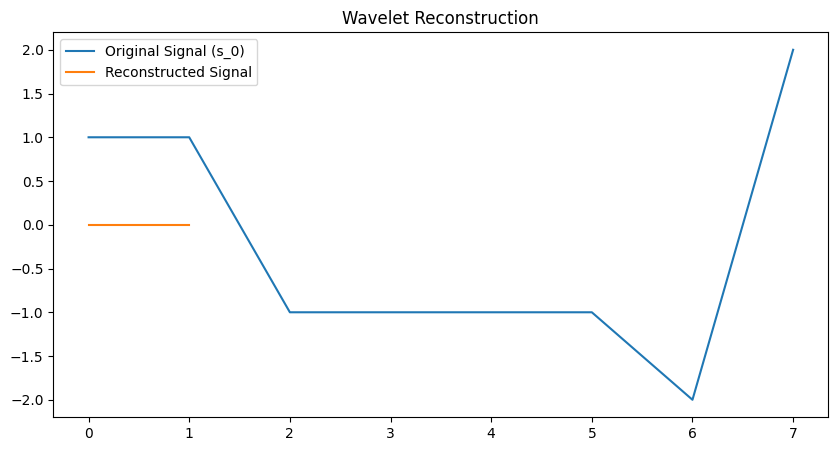

In [25]:
# 3. Wavelet recon
# Load the data
def waverec(approximation_coeffs, wavelet_coeffs):

    # Perform Inverse Discrete Wavelet Transform (IDWT) using Haar wavelets.

    if not isinstance(approximation_coeffs[-1], np.ndarray):
        # If the last approximation coefficient is a scalar, convert it to a 1-element array
        s_m = np.array([approximation_coeffs[-1]])
    else:
        s_m = approximation_coeffs[-1]

    n = len(s_m) * 2
    s_0 = np.zeros(n)

    for m in range(len(wavelet_coeffs) - 1, -1, -1):
        w_m = wavelet_coeffs[m]
        if len(s_m) == 1:
            s_0[:len(s_m)] = haar_wavelet_inverse_transform(s_m, w_m)[:1]  # Adjust the assignment for scalar
        else:
            s_0[:len(s_m)] = haar_wavelet_inverse_transform(s_m, w_m)
        s_m = s_0[:len(s_m)]  # Update s_m for the next iteration

    return s_0

data = np.load('Wavelet_recon.npz')
approximation_coeffs = data['s11']
wavelet_coeffs = [data[f'w{m}'] for m in range(1, 12)]

reconstructed_signal = waverec(approximation_coeffs, wavelet_coeffs)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 5))
plt.plot(s_0, label='Original Signal (s_0)')
plt.plot(reconstructed_signal, label='Reconstructed Signal')
plt.title('Wavelet Reconstruction')
plt.legend()
plt.show()